In [1]:
import sys
sys.path.append('../')

import cqt
import cqt.env as env
import cqt.ledger.ledger as ledger

from cqt.strats.strategy import Strategy
import cqt.strats.strategy_double_dip as sdd
import cqt.strats.strategy_long_short_average as sma

import pandas as pd
import pickle

from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt

In [2]:
file_btc_eth = open('../data/pickle/model_btc_eth.pickle','rb')
env_btc_eth = pickle.load(file_btc_eth)

In [3]:
# init portfolio

cash = 100000
assets = {'btc': 0, 'eth': 0}
ini = ledger.Ledger(assets, cash)

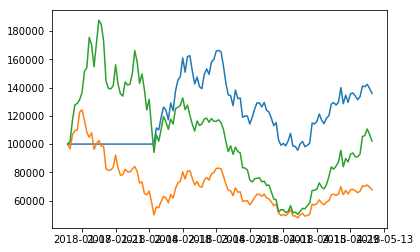

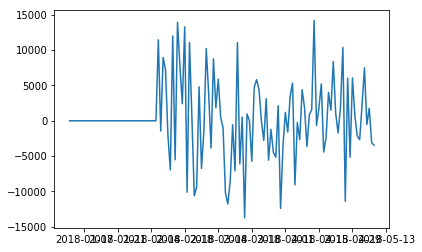

          date          total      pnl    cash  set_aside btc_holding  \
0   2018-01-01  100000.000000        0  100000        0.0           0   
1   2018-01-02  100000.000000        0  100000        0.0           0   
2   2018-01-03  100000.000000        0  100000        0.0           0   
3   2018-01-04  100000.000000        0  100000        0.0           0   
4   2018-01-05  100000.000000        0  100000        0.0           0   
5   2018-01-06  100000.000000        0  100000        0.0           0   
6   2018-01-07  100000.000000        0  100000        0.0           0   
7   2018-01-08  100000.000000        0  100000        0.0           0   
8   2018-01-09  100000.000000        0  100000        0.0           0   
9   2018-01-10  100000.000000        0  100000        0.0           0   
10  2018-01-11  100000.000000        0  100000        0.0           0   
11  2018-01-12  100000.000000        0  100000        0.0           0   
12  2018-01-13  100000.000000        0  100000     

In [4]:
# Long/Short Average

ls_rule = {'method' : 'moving_average', 'window_size' : [30, 90], 'tolerance_up' : 0.0, 'tolerance_down' : 0.0}
strats = sma.StrategySimpleMA(env_btc_eth, ini, ls_rule)
start_date_str = '2018-01-01'
start_date = datetime.strptime(start_date_str, '%Y-%m-%d')
report = strats.back_testing(start_date)

print(report)

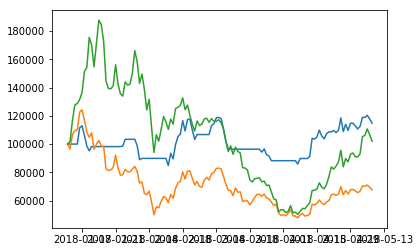

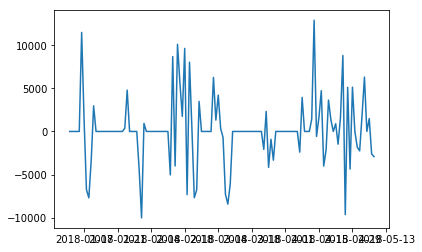

          date          total      pnl     cash  set_aside btc_holding  \
0   2018-01-01  100000.000000        0   100000        0.0           0   
1   2018-01-02  100000.000000        0   100000        0.0           0   
2   2018-01-03  100000.000000        0   100000        0.0           0   
3   2018-01-04  100000.000000        0   100000        0.0           0   
4   2018-01-05  100000.000000        0        0        0.0     6.57895   
5   2018-01-06  111483.625976  11483.6        0        0.0     6.57895   
6   2018-01-07  112993.495390  1509.87        0        0.0     6.57895   
7   2018-01-08  106251.056744 -6742.44        0        0.0     6.57895   
8   2018-01-09   98552.762206 -7698.29        0        0.0     6.57895   
9   2018-01-10   95247.102136 -3305.66        0        0.0     6.57895   
10  2018-01-11   98219.735671  2972.63  98219.7        0.0           0   
11  2018-01-12   98219.735671        0  98219.7        0.0           0   
12  2018-01-13   98219.735671        0

In [5]:
# Long/Short Average

ls_rule = {'method' : 'moving_average', 'window_size' : [3, 7], 'tolerance_up' : 0.0, 'tolerance_down' : 0.0}
strats = sma.StrategyInverseMA(env_btc_eth, ini, ls_rule)
start_date_str = '2018-01-01'
start_date = datetime.strptime(start_date_str, '%Y-%m-%d')
report = strats.back_testing(start_date)

print(report)

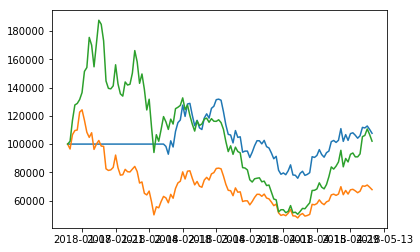

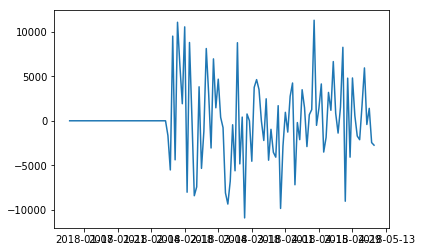

          date          total      pnl    cash  set_aside btc_holding  \
0   2018-01-01  100000.000000        0  100000        0.0           0   
1   2018-01-02  100000.000000        0  100000        0.0           0   
2   2018-01-03  100000.000000        0  100000        0.0           0   
3   2018-01-04  100000.000000        0  100000        0.0           0   
4   2018-01-05  100000.000000        0  100000        0.0           0   
5   2018-01-06  100000.000000        0  100000        0.0           0   
6   2018-01-07  100000.000000        0  100000        0.0           0   
7   2018-01-08  100000.000000        0  100000        0.0           0   
8   2018-01-09  100000.000000        0  100000        0.0           0   
9   2018-01-10  100000.000000        0  100000        0.0           0   
10  2018-01-11  100000.000000        0  100000        0.0           0   
11  2018-01-12  100000.000000        0  100000        0.0           0   
12  2018-01-13  100000.000000        0  100000     

In [6]:
# Long/Short Average

ls_rule = {'method' : 'moving_average', 'window_size' : [3, 5, 30, 90], 'tolerance_up' : 0.0, 'tolerance_down' : 0.0}
strats = sma.StrategyBlendMA(env_btc_eth, ini, ls_rule)
start_date_str = '2018-01-01'
start_date = datetime.strptime(start_date_str, '%Y-%m-%d')
report = strats.back_testing(start_date)

print(report)

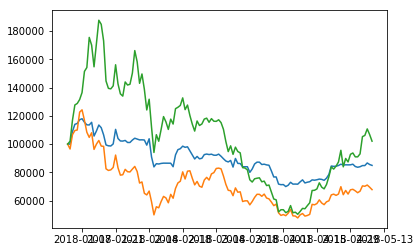

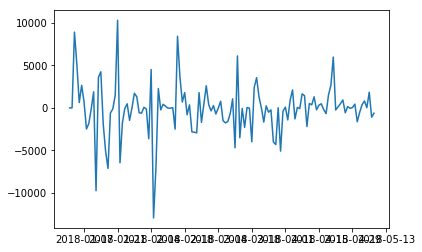

          date          total      pnl     cash  set_aside btc_holding  \
0   2018-01-01  100000.000000        0   100000        0.0           0   
1   2018-01-02  100000.000000        0    25000        0.0     3.74857   
2   2018-01-03  108890.899183   8890.9     6250        0.0      4.5966   
3   2018-01-04  113993.663838  5102.76  20527.7        0.0      2.2983   
4   2018-01-05  114614.095212  620.431  67570.9        0.0     1.14915   
5   2018-01-06  117258.036808  2643.94  92414.5        0.0    0.574575   
6   2018-01-07  117960.437344  702.401  54046.1        0.0     3.26495   
7   2018-01-08  115474.054201 -2486.38  84760.1        0.0     1.63248   
8   2018-01-09  113642.380311 -1831.67  99201.2        0.0    0.816238   
9   2018-01-10  113538.426656 -103.954  50860.6        0.0     4.24227   
10  2018-01-11  115415.823852   1877.4  26040.6        0.0     5.94565   
11  2018-01-12  105683.569866 -9732.25    13298        0.0     6.92449   
12  2018-01-13  109268.657987  3585.09

In [7]:
dd_rule = {'method' : 'moving_average', 'window_size' : [3, 7], 'tolerance_up' : 0.01, 'tolerance_down' : 0.01}
strats = sdd.StrategyDoubleDip(env_btc_eth, ini, dd_rule)
start_date_str = '2018-01-01'
start_date = datetime.strptime(start_date_str, '%Y-%m-%d')
report = strats.back_testing(start_date)

print(report)

In [8]:
from cqt.analyze.signal_consecutive_moves import signal_consecutive_moves as sigcm

class StrategyTest(Strategy):
    def apply_event_logic(self, time, ledger):
        ratio = 1.0 / len(self.env.get_targets())
        
        for coin in self.env.get_targets():
            if self.env.has_section(coin):
                sec_coin = self.env.get_section(coin)
                ind_coin = sigcm(self.env, coin, time, self.rules)
                price_coin = sec_coin.get_price_close(time)

                if ind_coin == 1:
                    ledger.buy(coin, price_coin, ratio)
                elif ind_coin == -1:
                    ledger.sell(coin, price_coin, ratio)
                else:
                    pass

        return ledger

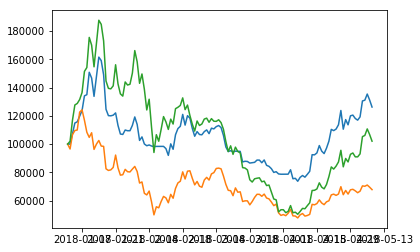

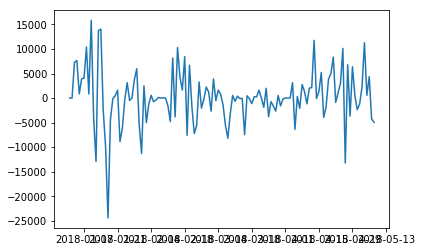

          date          total      pnl         cash  set_aside btc_holding  \
0   2018-01-01  100000.000000        0       100000        0.0           0   
1   2018-01-02  100000.000000        0        50000        0.0           0   
2   2018-01-03  107273.199515   7273.2        25000        0.0           0   
3   2018-01-04  114928.611763  7655.41         6250        0.0    0.825409   
4   2018-01-05  115781.089692  852.478       1562.5        0.0       1.031   
5   2018-01-06  119706.819860  3925.73      390.625        0.0     1.07711   
6   2018-01-07  123770.807717  4063.99      97.6562        0.0     1.08848   
7   2018-01-08  134168.553331  10397.7      24.4141        0.0      1.0915   
8   2018-01-09  134995.744436  827.191      6.10352        0.0     1.09232   
9   2018-01-10  150852.447928  15856.7      3956.56        0.0    0.546158   
10  2018-01-11  146749.671229 -4102.78      4016.73        0.0    0.273079   
11  2018-01-12  133809.865788 -12939.8      2916.47        0.0  

In [9]:
cm_rule = {'method' : 'moving_average', 'window_size' : [3], 'tolerance_up' : 0.01, 'tolerance_down' : 0.01}
strats = StrategyTest(env_btc_eth, ini, cm_rule)
start_date_str = '2018-01-01'
start_date = datetime.strptime(start_date_str, '%Y-%m-%d')
report = strats.back_testing(start_date)

print(report)